<div class="alert alert-block alert-danger">
    
### Notes

</div>

### K Nearest Neighbours, Numerical python, $ \ldots $.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import confusion_matrix

In [4]:
np.random.seed(1234)

In [5]:
data = datasets.load_iris()

***

In [6]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data.data, data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
predictions = model.predict(data.data)
print(confusion_matrix(data.target, predictions))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


***

In [8]:
def classify_and_plot_decision_boundaries(k=1):
    
    plots = { 0 : ([], []), 1 : ([], []), 2 : ([], []) }
    markers = { 0 : "o", 1 : "s", 2 : "^" }
    colors  = { 0 : "r", 1 : "b", 2 : "g" }
    
    min_sepal_length, max_sepal_length = int(np.min(data.data[:, 0])), int(np.max(data.data[:, 0]))
    min_sepal_width, max_sepal_width = int(np.min(data.data[:, 1])), int(np.max(data.data[:, 1]))

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(data.data[:, [0,1]], data.target)
    
    for sepal_length in np.linspace(min_sepal_length, max_sepal_length, 100):
        for sepal_width in np.linspace(min_sepal_width, max_sepal_width, 100):
            predicted_label = model.predict(np.expand_dims(np.array([sepal_length, sepal_width]), axis=0))
            plots[predicted_label[0]][0].append(sepal_length)
            plots[predicted_label[0]][1].append(sepal_width)

    # create scatter series for each label
    plt.figure(figsize=(8,8))
    for label, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=data.target_names[label], zorder=0)

    plt.legend(loc=0)
    plt.title('{}-Nearest Neighbors'.format(k))
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

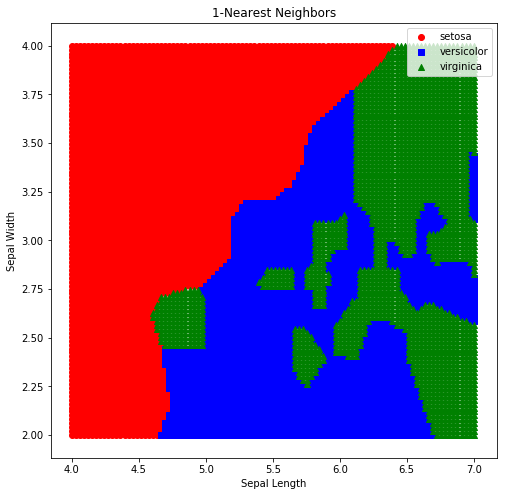

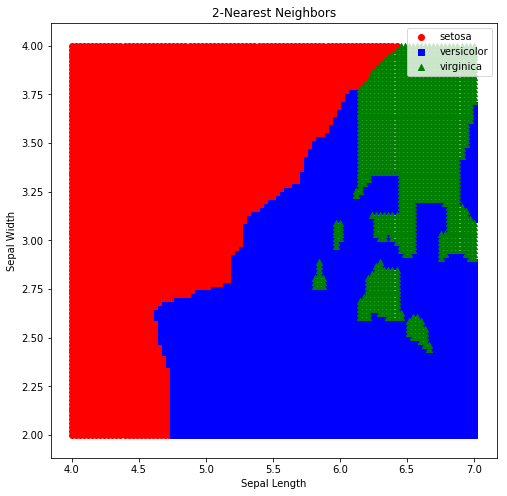

In [9]:
classify_and_plot_decision_boundaries(1)
classify_and_plot_decision_boundaries(2)

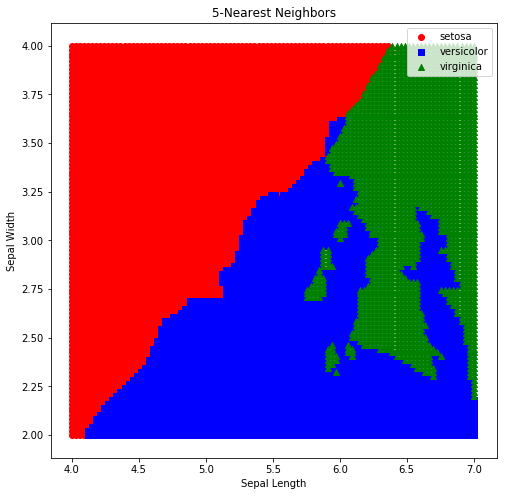

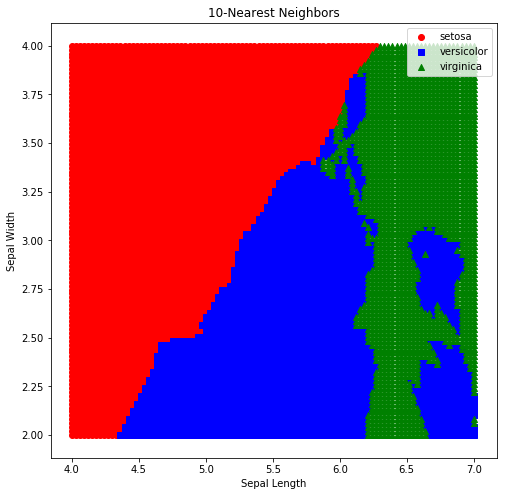

In [10]:
classify_and_plot_decision_boundaries(5)
classify_and_plot_decision_boundaries(10)

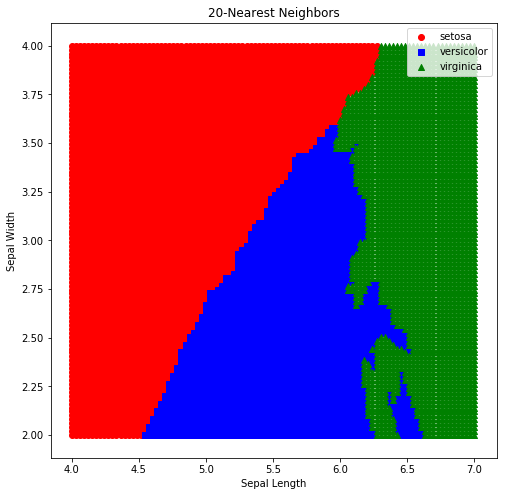

In [11]:
classify_and_plot_decision_boundaries(20)